In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core import display as ICD
init_notebook_mode(connected=True)

In [2]:
#read in csv file
df = pd.read_csv("./data/parking-citations.csv",low_memory=False)

In [6]:
#show the first five rows of the dataframe
df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


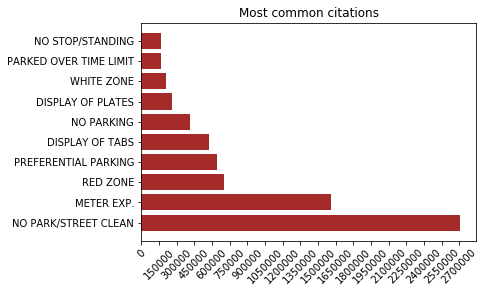

In [7]:
#Get the 10 most common types of citations
violation_count  = df['Violation Description'].value_counts()[:10]
#create the labels for the x-axis
xticks = [x for x in range(0,2800000,150000)]
#create a horizontal bar plot
plt.barh(violation_count.index,violation_count.values,color="brown")
#set the x-ticks
plt.xticks(xticks,rotation=45)
#set the title for the plot
plt.title("Most common citations")
#show the plot
plt.show()

In [4]:
df = df.sort_values(by='Issue Date')
data2 = df
df['Issue Date'] = df[df['Issue Date'].notnull()]['Issue Date'].apply(lambda x: x.split('T')[0])
df['Issue Date'] = pd.to_datetime(df['Issue Date'], infer_datetime_format=True)
data2.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
107223,1108852275,2010-01-09,15.0,NaN,NaN,CA,201512.0,NaN,FORD,SU,GR,WOODWARD/FOOTHILL,16A35,1.0,80732,EXCEED 72 HOURS,NaN,9.999900e+04,9.999900e+04
8770002,1120588372,2010-01-09,750.0,NaN,NaN,CA,NaN,NaN,NISS,PA,BK,8113 CEDROS,35MQ8,1.0,5204A,EXPIRED TAGS,25.0,6.424555e+06,1.902079e+06
6868664,1111002093,2010-02-03,501.0,NaN,NaN,CA,201807.0,NaN,CHEV,PA,GY,4000 S LA BREA AVE,00500,55.0,8606,PK OTSD PSTD AR,NaN,6.453965e+06,1.827239e+06
4826069,1117055376,2010-03-09,2041.0,NaN,NaN,CA,201704.0,NaN,NISS,PA,SI,WESTERN CYN/OBSERVAT,NaN,4.0,8603,PK IN PROH AREA,NaN,9.999900e+04,9.999900e+04
786475,1109361761,2010-04-27,2140.0,NaN,NaN,TN,201701.0,NaN,FORD,PA,RE,2111 W 54TH ST,01213,1.0,011,22500F,NaN,9.999900e+04,9.999900e+04


In [5]:
data2['oldDate'] = data2['Issue Date']
data2['newDate'] = pd.DatetimeIndex(data2.oldDate).normalize()
dateCounts = data2['newDate'].value_counts()
dateCountsDf = pd.DataFrame(dateCounts)
dateCountsDf.head()

,newDate
2016-01-19,9830
2014-12-31,9605
2016-05-05,9366
2016-02-23,9339
2015-06-09,9275


In [6]:
dateCountsDf['date2'] = dateCountsDf.index
dateCountsDf = dateCountsDf.sort_values(by='date2')
dateCountsDf = dateCountsDf.resample('W', on='date2').sum()
dateCountsDf = dateCountsDf.reset_index(level='date2')
dateCountsDf = dateCountsDf[(dateCountsDf['date2'].dt.year > 2014)] 

In [8]:
df = dateCountsDf
trace1 = go.Scatter(
                    x = df.date2,
                    y = df.newDate,
                    mode = "lines+markers",
                    name = "gettingStarted",
                    marker = dict(color = 'rgba(0, 255, 0, 0.8)'),)
data = [trace1]
layout = dict(title = 'Weekly Count of Parking Tickets in Los Angeles',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= True),yaxis= dict(title= 'number of Parking Tickets',ticklen= 5,zeroline= False),legend=dict(orientation= "h",x=0, y= 1.13)
             )
fig = dict(data = data, layout = layout)
iplot(fig)